In [1]:
from maelzel.core import *


In [2]:
struct = ScoreStruct(r'''
3/16, 100
2/16
3/16
4/16
2/16
3/16
5/16
4/16
5/16
6/16
4/16, barline=double
2/16
4/16
3/16
7/16
2/16
4/16
.
5/16
4/16
8/16
4/16, barline=double
3/16
2/16
5/16
6/16
4/16
3/16
4/16
5/16
3/16
6/16
3/16, barline=double
6/16
3/16
4/16
5/16
2/16
3/16
4/16
5/16
8/16
4/16
6/16, barline=double
2/16
3/16
5/16
4/16
3/16
2/16
5/16
2/16
3/16
6/16
2/16, barline=double
3/16
.
.
.
2/16
3/16
4/16
5/16
4/16
8/16
2/16
3/16
4/16
3/16
.
.
4/16
4/16, barline=final
''')

setScoreStruct(struct)

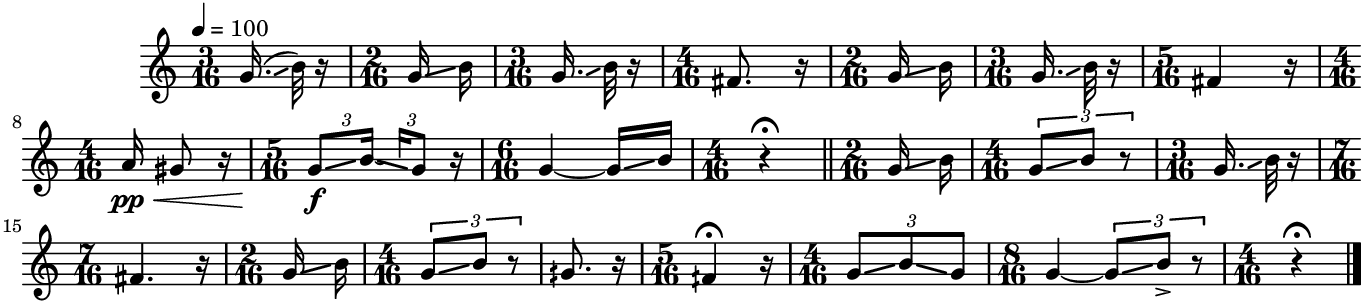

Score(1 voices)
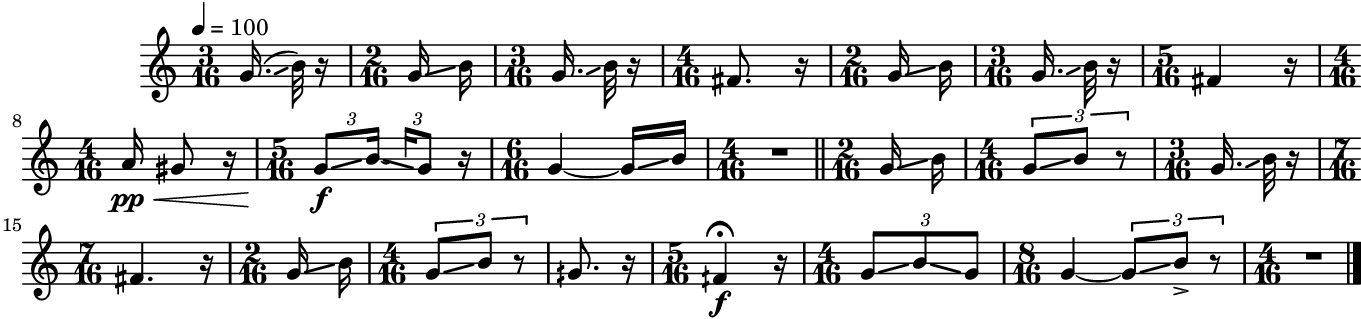

In [3]:

ch = Chain([
    Note("4G:3/8:gliss").addSpanner('slur'), Note("4B/32").addSpanner('~slur'), "R/16",
    "4G/16:gliss", "4B/16",
    "4G:.375:gliss", "4B/32", "R/16",
    "4F#/8.", "R/16",
    
    "4G/16:gliss", "4B/16",
    "4G:.375:gliss", "4B/32", "R/16",
    "4F#/4", "R/16",
    
    Note("4A/16:pp").addSpanner('<'), "4G#/8", "R/16",
    "4G:1/3:f:gliss", "4B:1/3:gliss", "4G:1/3", "R/16",
    "4G~:1", "4G/16:gliss", "4B/16",
    
    Rest(1).addSymbol(symbols.Fermata()),
    
    "4G/16:gliss", "4B/16",
    "4G:1/3:gliss", "4B:1/3", "r:1/3",
    "4G:.375:gliss", "4B/32", "R/16",
    "4F#:1.5", "r/16",
    
    "4G/16:gliss", "4B/16",
    "4G:1/3:gliss", "4B:1/3", "r:1/3",
    
    "4G+:3/4", "r/16",
    Note("4F+:1:f").addSymbol('fermata'), "r/16",
    
    "4G:1/3:gliss", "4B:1/3:gliss", "4G:1/3",
    "4G~:1", "4G:1/3:gliss", "4B:1/3:articulation=accent", "r:1/3",
    
    Rest(1).addSymbol('fermata'),

])
ch.show()
q = ch.quantizedScore()
sc = q.toCoreScore()
sc

In [4]:
for i in range(struct.numMeasures()):
    #print("---------------", i)
    events = ch.eventsBetween((i, 0), (i+1, 0))
    if events:
        ev0 = events[0]
        if not ev0.isRest():
            ev0.addSymbol('tenuto')
    #for ev in events:
    #    print("    ", ev)

Chain([4G:0.375♩:gliss=True:symbols=[Slur(anchor=<weakref at 0x7f5f09588040; to 'Note' at 0x7f5f4c4c6ea0>, kind=start, linetype=solid, uuid=6k6bv316)], 4B:0.125♩:symbols=[Slur(anchor=<weakref at 0x7f5f095880e0; to 'Note' at 0x7f5f4c4c6cc0>, kind=end, linetype=solid, uuid=waopdhim)], Rest:0.25♩, 4G:0.25♩:gliss=True, 4B:0.25♩, 4G:0.375♩:gliss=True, 4B:0.125♩, Rest:0.25♩, 4F#:0.75♩, Rest:0.25♩, …])
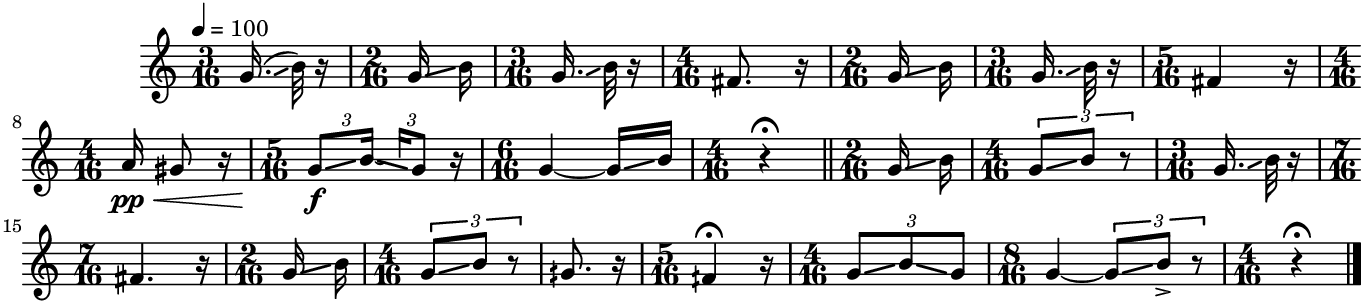

In [4]:
ch

Chain([4G:4♩, 4A:3♩, 4B:2♩, 5C:1♩, 5D:0.75♩, 5E:0.667♩])
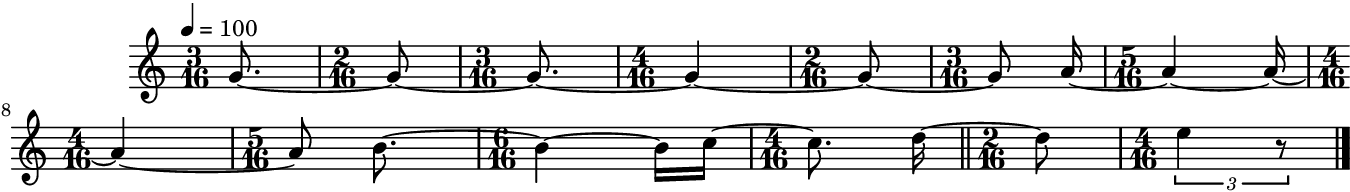

In [5]:
ch2 = Chain([
    "4G:4",
    "4A:3",
    "4B:2",
    "5C:1",
    "5D:3/4",
    "5E:2/3"
])
ch2

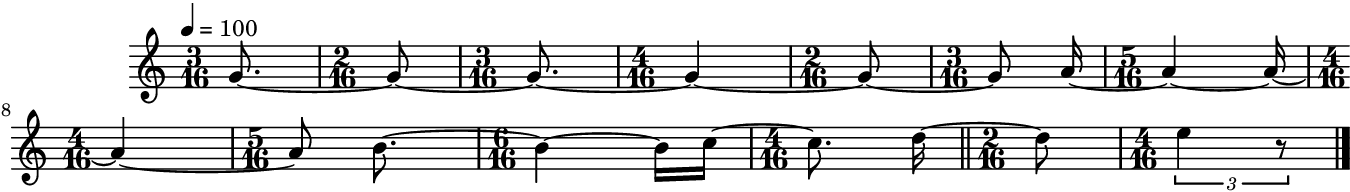

In [6]:
ch3 = ch2.copy()
ch3.splitEventsAtMeasures()
ch3.show()
ch3.dump()

Chain([4G~:0.75♩:offset=0:symbols=[Articulation(kind=accent)], 4G~:0.5♩:offset=0.75:symbols=[Articulation(kind=accent)], 4G~:0.75♩:offset=1.25:symbols=[Articulation(kind=accent)], 4G~:1♩:offset=2:symbols=[Articulation(kind=accent)], 4G~:0.5♩:offset=3:symbols=[Articulation(kind=accent)], 4G:0.5♩:offset=3.5:symbols=[Articulation(kind=accent)], 4A~:0.25♩:offset=4, 4A~:1.25♩:offset=4.25:symbols=[Articulation(kind=accent)], 4A~:1♩:offset=5.5:symbols=[Articulation(kind=accent)], 4A:0.5♩:offset=6.5:symbols=[Articulation(kind=accent)], …])
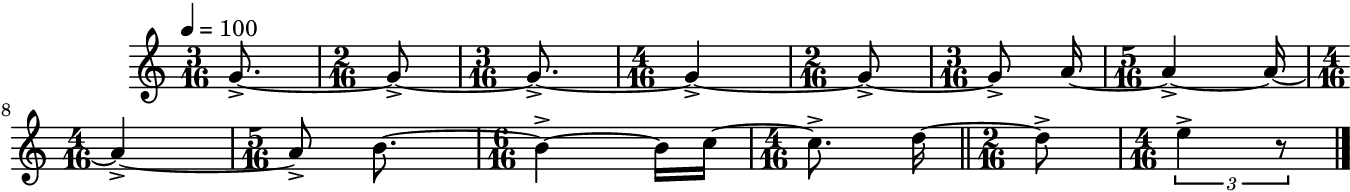

In [7]:
for i in range(struct.numMeasures()):
    #print("---------------", i)
    events = ch3.eventsBetween((i, 0), (i+1, 0))
    if events:
        ev0 = events[0]
        if not ev0.isRest():
            ev0.addSymbol('accent')
ch3